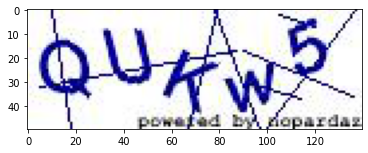

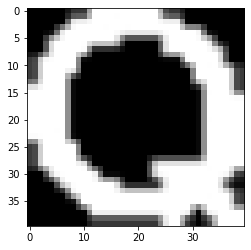

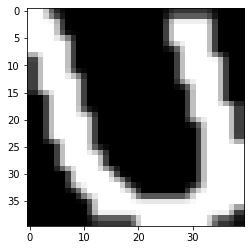

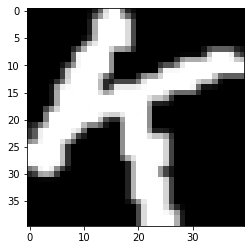

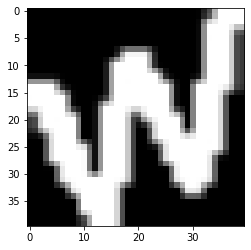

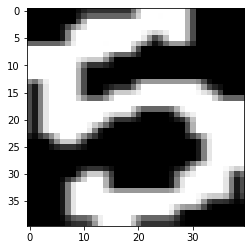

Predicted Text Is: QUKW5


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from cropLettersFromImage import getWords
import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd
import numpy as np
import os, pickle

DataDirectory = './DataSet/'
Categories = os.listdir(DataDirectory)

filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

def getCaptchaText(Captcha):
    plt.imshow(plt.imread(Captcha))
    plt.show()
    clusters = getWords(Captcha)
    text = ''
    for image in clusters:
        flat_data = []
        img_resized = resize(image,(40,40,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
#         plt.imshow(img_resized)
#         plt.show()
        y_output = loaded_model.predict(flat_data)
        text += Categories[y_output[0]].replace('upper', '').replace('lower', '')
    return text

Captcha = './Golestan-Captchas/69310.gif'
text = getCaptchaText(Captcha)
print("Predicted Text Is:", text)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from cropLettersFromImage import getWords
import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd
import numpy as np
import os, pickle

In [9]:
target = []
flat_data = []
DataDirectory = './DataSet/'

Categories = os.listdir(DataDirectory)

for index, i in enumerate(Categories):
    print(i, '-> ', str(round(100*(index + 1)/len(Categories))) + '%')
    target_class = index
    path = os.path.join(DataDirectory,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
#         img_resized = img_array[:210, 30:-1, :]
        img_resized = resize(img_array,(40,40,3))
        flat_data.append(img_resized.flatten())
        target.append(target_class)

flat_data = np.array(flat_data)
target = np.array(target)

e ->  3%
q ->  7%
3 ->  10%
g ->  13%
d ->  17%
f ->  20%
k ->  23%
7 ->  27%
5 ->  30%
c ->  33%
9 ->  37%
x ->  40%
m ->  43%
y ->  47%
r ->  50%
b ->  53%
2 ->  57%
v ->  60%
p ->  63%
6 ->  67%
t ->  70%
u ->  73%
n ->  77%
4 ->  80%
z ->  83%
h ->  87%
a ->  90%
8 ->  93%
s ->  97%
w ->  100%


In [10]:
df = pd.DataFrame(flat_data)
df['Target'] = target

In [11]:
x = df.iloc[:,:-1].values
y = target

print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 109, stratify = y)

print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (7135, 4800)
Output data dimensions: (7135,)
Dimensions of input training data: (5708, 4800)
Dimensions of input testing data: (1427, 4800)
Dimensions of output training data: (5708,)
Dimensions of output testing data: (1427,)


In [12]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# filename = 'finalized_model.sav'
# pickle.dump(knn, open(filename, 'wb'))

In [ ]:
filename = 'finalized_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [13]:
y_pred = knn.predict(x_test)
print(y_test)
print(y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

[ 9 13 13 ... 16 19 24]
[ 9 13 13 ... 16 19 24]
0.9670637701471618


In [16]:
def getCaptchaText(Captcha):
    plt.imshow(plt.imread(Captcha))
    plt.show()
    clusters = getWords(Captcha)
    text = ''
    for image in clusters:
        flat_data = []
        img_resized = resize(image,(40,40,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
#         plt.imshow(img_resized)
#         plt.show()
        y_output = knn.predict(flat_data)

        text += Categories[y_output[0]].replace('upper', '').replace('lower', '')
    return text

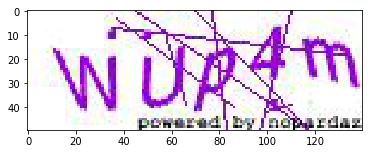

Predicted Text Is: wup4m


In [17]:
Captcha = './Golestan-Captchas/15305.gif'
text = getCaptchaText(Captcha)
print("Predicted Text Is:", text)